In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
# Carga de datos
df = pd.read_csv(r"../data/final/final_dataset_versionpavel.csv")
df.insert(0, 'status_inf', df.pop('status_inf'))
df = df.drop(columns=['conglome', 'vivienda','hogar','codperso','periodo','ocupinf_t1','ocupinf_t2','periodo'])
df

,status_inf,sexo,edad,estadocivil,tuvotrabajo,categoria_trabajador,trabajopara,registrosunat,cuentassunat,tipocontrato,...,electricidad,celular,internet,personas_ingresos,personas_hogar,pobreza,tiempotrabajo,alquiler,horastotales_sempasada,ingtrabw
0,0,2,47,2,1,3,2,99,99,1.0,...,1.0,1,0,2,5,3,12.000000,500,40,15491.0
1,1,1,57,1,1,2,99,2,1,99.0,...,1.0,1,0,3,5,3,38.000000,80,48,28505.0
2,0,1,29,6,1,3,2,99,99,1.0,...,1.0,1,0,4,5,3,4.250000,200,16,35810.0
3,0,1,26,6,1,3,2,99,99,2.0,...,1.0,1,0,4,5,3,0.416667,200,25,10779.0
4,0,1,67,2,1,2,99,2,2,99.0,...,1.0,1,0,3,4,3,40.000000,1000,58,23592.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20033,1,1,61,2,1,2,99,2,2,99.0,...,1.0,1,1,4,7,3,17.000000,1000,60,24033.0
20034,0,1,56,2,1,4,6,1,1,1.0,...,1.0,1,1,4,6,3,30.000000,1000,48,73477.0
20035,0,1,29,6,1,3,2,99,99,2.0,...,1.0,1,1,4,6,3,2.000000,1000,42,42659.0
20036,0,1,31,2,1,4,5,1,1,2.0,...,1.0,1,0,2,6,3,0.250000,18,52,19657.0


In [3]:
print(df.info())
print("La distribución de la variable objetivo statu_inf es:")
print(df['status_inf'].value_counts())
print("La cantidad de preguntas de los datos originales (indep y objetivo) es",df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20038 entries, 0 to 20037
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status_inf               20038 non-null  int64  
 1   sexo                     20038 non-null  int64  
 2   edad                     20038 non-null  int64  
 3   estadocivil              20038 non-null  int64  
 4   tuvotrabajo              20038 non-null  int64  
 5   categoria_trabajador     20038 non-null  int64  
 6   trabajopara              20038 non-null  int64  
 7   registrosunat            20038 non-null  int64  
 8   cuentassunat             20038 non-null  int64  
 9   tipocontrato             20037 non-null  float64
 10  numpersonastrabajo       20038 non-null  int64  
 11  tuvootrotrabajo          20038 non-null  int64  
 12  normtrabaja              20038 non-null  int64  
 13  horas_normtrabaja        20038 non-null  int64  
 14  disponiblehorastrabaja

In [4]:
categoricas = ['sexo','estadocivil','tuvotrabajo','categoria_trabajador','trabajopara','registrosunat',
               'cuentassunat','tipocontrato','numpersonastrabajo','tuvootrotrabajo','normtrabaja',
               'disponiblehorastrabajar','deseaotrotrabajo','antepasadosconsidera','perteneceindig',
               'lenguamaterna','niveleduc','asiste_educ','usointernet','viviadistrito','padece_enfer',
               'sintoma_malestar','enfermedad','recaida','accidente','notuvoenf','essalud','seguroprivado',
               'eps','seguroffaa','sis','tipovivienda','materialparedes','materialpisos','materialtechos',
               'vivienda_status','viviendatitulo','agua_procedencia','agua_potable','conexionsshh','electricidad',
               'celular','internet','pobreza']
df_indep = df.drop(columns = ['status_inf'])
df_categoricas = df_indep[categoricas]
df_continuas = df_indep.drop(columns=categoricas)
print("Total de variables indep")
print(df_indep.shape[1])
print("La cantidad de variables indep categoricas:")
print(df_categoricas.shape[1])
print("La cantidad de variables indep continuas:")
print(df_continuas.shape[1])


Total de variables indep
54
La cantidad de variables indep categoricas:
44
La cantidad de variables indep continuas:
10


In [5]:
# Crear dummies a partir de las variables categóricas
df_categoricas_encoded = pd.get_dummies(df_categoricas, columns=categoricas, drop_first=True, dummy_na=False)
print('La cantidad de variables indep categóricas después de haberse convertido en dummies es:')
print(df_categoricas_encoded.shape[1])

La cantidad de variables indep categóricas después de haberse convertido en dummies es:
131


In [6]:
# El dataset final de variables independientes (categoricas convertidas a dummies + continuas)
df_indep_final = pd.concat([df_categoricas_encoded, df_continuas], axis=1)
print('La cantidad de variables indep totales (categoricas convertidas a dummies + continuas) es:')
print(df_indep_final.shape[1])


La cantidad de variables indep totales (categoricas convertidas a dummies + continuas) es:
141


In [7]:
df_indep_final

,sexo_2,estadocivil_2,estadocivil_3,estadocivil_4,estadocivil_5,estadocivil_6,tuvotrabajo_2,categoria_trabajador_2,categoria_trabajador_3,categoria_trabajador_4,...,edad,horas_normtrabaja,habitaciones,habitacionesdormir,personas_ingresos,personas_hogar,tiempotrabajo,alquiler,horastotales_sempasada,ingtrabw
0,True,True,False,False,False,False,False,False,True,False,...,47,40,5.0,3.0,2,5,12.000000,500,40,15491.0
1,False,False,False,False,False,False,False,True,False,False,...,57,48,1.0,0.0,3,5,38.000000,80,48,28505.0
2,False,False,False,False,False,True,False,False,True,False,...,29,40,4.0,3.0,4,5,4.250000,200,16,35810.0
3,False,False,False,False,False,True,False,False,True,False,...,26,25,4.0,3.0,4,5,0.416667,200,25,10779.0
4,False,True,False,False,False,False,False,True,False,False,...,67,58,6.0,3.0,3,4,40.000000,1000,58,23592.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20033,False,True,False,False,False,False,False,True,False,False,...,61,60,6.0,5.0,4,7,17.000000,1000,60,24033.0
20034,False,True,False,False,False,False,False,False,False,True,...,56,48,7.0,6.0,4,6,30.000000,1000,48,73477.0
20035,False,False,False,False,False,True,False,False,True,False,...,29,42,7.0,6.0,4,6,2.000000,1000,42,42659.0
20036,False,True,False,False,False,False,False,False,False,True,...,31,52,3.0,1.0,2,6,0.250000,18,52,19657.0


##### Empezamos a realizar tratamiento estadístico (a partir del dataset de variables independientes (df_indep_final)):

In [8]:
# Filtrar variables con un gran número de faltantes
null_percent = df_indep_final.isnull().mean()*100
cols_null = null_percent[null_percent > 80 ].index
cols_validas = null_percent[null_percent <= 80 ].index
print(cols_null)
# df_null = df[cols_validas].copy()
# df_null.shape[1]

Index([], dtype='object')


In [9]:
# Para eliminar las variables con muy poca varianza (definido por el umbral)
varianzas = df_indep_final.var()
umbral = 0.01
vars_seleccionadas = varianzas[varianzas > umbral].index
vars_no_seleccionadas = varianzas[varianzas <= umbral].index

print("Las variables con varianza menor al umbral son:")
print(df_indep_final[vars_no_seleccionadas].nunique())
## print(df_indep_final[vars_seleccionadas].nunique())

df_indep_final=df_indep_final[vars_seleccionadas]

print("El nuevo número de variables del dataset de variables independientes es:")
print(df_indep_final.shape[1])

Las variables con varianza menor al umbral son:
categoria_trabajador_6    2
trabajopara_3             2
registrosunat_3           2
tipocontrato_3.0          2
tipocontrato_4.0          2
tipocontrato_5.0          2
lenguamaterna_3.0         2
lenguamaterna_6.0         2
lenguamaterna_7.0         2
lenguamaterna_8.0         2
tipovivienda_5.0          2
tipovivienda_6.0          2
tipovivienda_7.0          2
materialparedes_2.0       2
materialparedes_6.0       2
materialparedes_8.0       2
materialpisos_7.0         2
materialtechos_6.0        2
materialtechos_7.0        2
materialtechos_8.0        2
vivienda_status_5         2
vivienda_status_7         2
agua_procedencia_3        2
agua_procedencia_6        2
electricidad_3.0          2
dtype: int64
El nuevo número de variables del dataset de variables independientes es:
116


In [10]:
# Cálculo de la correlación entre variables y eliminar las más altas referente a un umbral (0.70):

corr_matrix = df_indep_final.corr().abs()

# 2. Seleccionamos la parte superior de la matriz de correlación
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

print("Variables a eliminar por alta correlación (>0.70):")
print(to_drop)

df_indep_final = df_indep_final.drop(columns=to_drop)

print("Nuevo número de variables del dataset de variables independientes después de eliminas las que tienen una alta correlación:")
print(df_indep_final.shape[1])

Variables a eliminar por alta correlación (>0.70):
['trabajopara_99', 'registrosunat_2', 'registrosunat_99', 'cuentassunat_2', 'cuentassunat_99', 'tipocontrato_99.0', 'numpersonastrabajo_5', 'seguroffaa_2', 'viviendatitulo_99', 'agua_procedencia_2', 'conexionsshh_2', 'pobreza_3', 'habitacionesdormir', 'horastotales_sempasada']
Nuevo número de variables del dataset de variables independientes después de eliminas las que tienen una alta correlación:
102


### Corremos un xgboost

In [11]:
df_model_xgb = pd.concat([df[["status_inf"]], df_indep_final], axis=1)
df_model_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20038 entries, 0 to 20037
Columns: 103 entries, status_inf to ingtrabw
dtypes: bool(94), float64(3), int64(6)
memory usage: 3.2 MB


c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:23:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

     Clase 0     0.8463    0.9578    0.8986      3318
     Clase 1     0.4466    0.1638    0.2397       690

    accuracy                         0.8211      4008
   macro avg     0.6465    0.5608    0.5691      4008
weighted avg     0.7775    0.8211    0.7852      4008



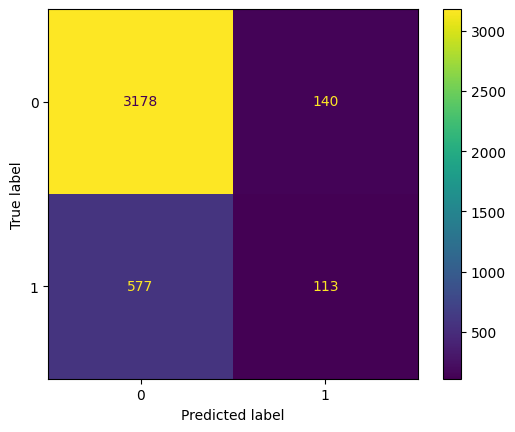

In [12]:
# XGBoost sin rebalanceo

X = df_model_xgb.drop(columns=['status_inf'])
y = df_model_xgb['status_inf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

report = classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"], digits=4)
print(report)


4.812182741116751


c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:23:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

     Clase 0     0.8826    0.7951    0.8365      3318
     Clase 1     0.3327    0.4913    0.3967       690

    accuracy                         0.7428      4008
   macro avg     0.6076    0.6432    0.6166      4008
weighted avg     0.7879    0.7428    0.7608      4008



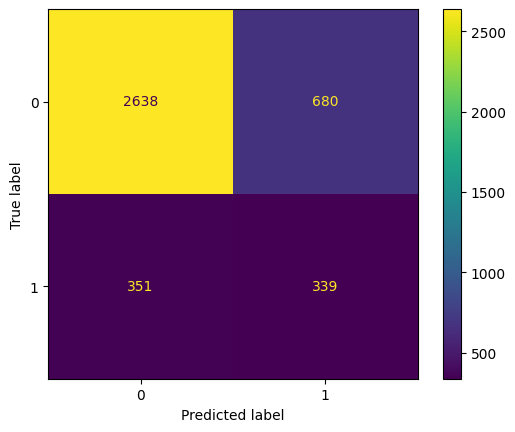

In [13]:
# XGBoost con rebalanceo

X = df_model_xgb.drop(columns=['status_inf'])
y = df_model_xgb['status_inf']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(scale_pos_weight)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                      scale_pos_weight = scale_pos_weight)
model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"], digits=4)
print(report)

Distribución de clases antes de SMOTE:
status_inf
0    13272
1     2758
Name: count, dtype: int64
Distribución de clases después de SMOTE:
status_inf
1    13272
0    13272
Name: count, dtype: int64
Valor de scale_pos_weight: 4.812182741116751
Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:29:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:29:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:29:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserW

              precision    recall  f1-score   support

     Clase 0     0.8759    0.8403    0.8577      3318
     Clase 1     0.3576    0.4275    0.3894       690

    accuracy                         0.7692      4008
   macro avg     0.6167    0.6339    0.6236      4008
weighted avg     0.7867    0.7692    0.7771      4008

F1-score: 0.38943894389438943
Precision: 0.3575757575757576
Recall: 0.427536231884058


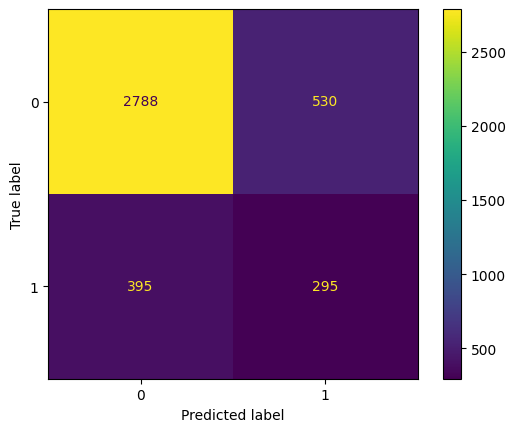

In [17]:
# Paso 1: Imputación de valores faltantes
from sklearn.impute import SimpleImputer

# Imputar los valores faltantes de las características
imputer = SimpleImputer(strategy='mean')  # O 'median' para variables numéricas
X_imputed = imputer.fit_transform(X)

# Paso 2: División de los datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

# Paso 3: Rebalanceo con SMOTE
from imblearn.over_sampling import SMOTE

# Conteo de clases antes de SMOTE
print("Distribución de clases antes de SMOTE:")
print(y_train.value_counts())

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Conteo de clases después de SMOTE
print("Distribución de clases después de SMOTE:")
print(y_train_res.value_counts())

# Paso 4: Calcular scale_pos_weight
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print("Valor de scale_pos_weight:", scale_pos_weight)

# Paso 5: Ajuste de hiperparámetros con RandomizedSearchCV (en lugar de GridSearchCV)
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Definir el modelo base con scale_pos_weight
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight)

# Definir los parámetros para RandomizedSearch
param_dist = {
    'learning_rate': np.linspace(0.01, 0.2, 5),
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2]
}

# RandomizedSearchCV para ajuste de hiperparámetros
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=10, scoring='f1', cv=3, verbose=1, random_state=42)

random_search.fit(X_train_res, y_train_res)

# Mejor modelo con los mejores parámetros
best_model = random_search.best_estimator_

# Paso 6: Entrenamiento con el mejor modelo
best_model.fit(X_train_res, y_train_res)

# Paso 7: Predicción y evaluación
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = best_model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Reporte de clasificación
report = classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"], digits=4)
print(report)

# Otras métricas
from sklearn.metrics import f1_score, precision_score, recall_score

print("F1-score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))



#### Corriendo ahora un Random Forest:

In [ ]:
# Crear el nuevo DataFrame sin valores faltantes

df_model_rf = pd.concat([df[["status_inf"]], df_indep_final], axis=1)
df_model_rf = df_model_rf.dropna()


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.91      3284
           1       0.53      0.05      0.08       682

    accuracy                           0.83      3966
   macro avg       0.68      0.52      0.49      3966
weighted avg       0.78      0.83      0.76      3966



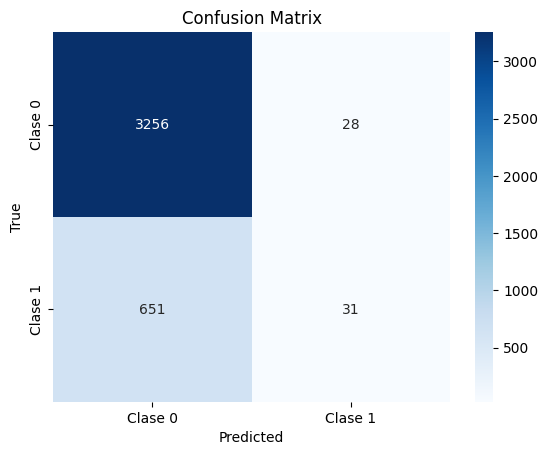

In [ ]:
# Random Forest sin rebalanceo
df_model_rf_noreb=df_model_rf

# 1. Dividir el dataset en X (características) y y (variable objetivo)
X = df_model_rf_noreb.drop(columns=['status_inf'])  # Eliminar la columna objetivo
y = df_model_rf_noreb['status_inf']  # Columna objetivo

# 2. Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 4. Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# 5. Imprimir el reporte de clasificación (Precision, Recall, F1-Score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 6. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      3284
           1       0.33      0.59      0.43       682

    accuracy                           0.73      3966
   macro avg       0.62      0.67      0.62      3966
weighted avg       0.80      0.73      0.75      3966



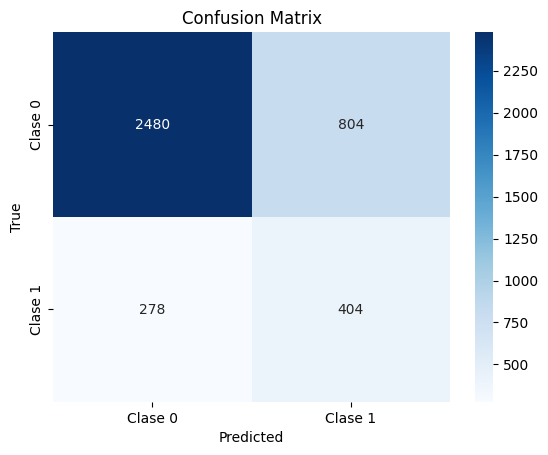

In [ ]:
# Random Forest con rebalanceo

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_model_rf_reb=df_model_rf


# 1. Dividir el dataset en X (características) y y (variable objetivo)
X = df_model_rf.drop(columns=['status_inf'])  # Eliminar la columna objetivo
y = df_model_rf['status_inf']  # Columna objetivo

# 2. Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Usar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Crear y entrenar el modelo Random Forest con ajuste de pesos
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Ajuste de class_weight
rf_model.fit(X_train_resampled, y_train_resampled)

# 5. Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# 6. Ajustar el umbral de decisión para mejorar recall de la clase 1
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1
y_pred_adjusted = (y_proba > 0.3).astype(int)  # Ajustar el umbral de 0.5 a 0.3

# 7. Imprimir el reporte de clasificación (Precision, Recall, F1-Score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

# 8. Matriz de confusión
cm = confusion_matrix(y_test, y_pred_adjusted)
disp = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Corriendo ahora el Lasso sobre el dataset post std treatment:


In [ ]:
df_lasso = pd.concat([df[["status_inf"]], df_indep_final], axis=1)
df_lasso = df_model_rf.dropna()
df_lasso_status_inf = df_lasso['status_inf']


In [ ]:
X = df_lasso.drop(columns=['status_inf'])
y = df_lasso['status_inf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
coef_abs = np.abs(lasso.coef_)

weights = 1 / (coef_abs + 1e-5)  

lasso_adaptive = Lasso(alpha=1.0)
lasso_adaptive.fit(X_train * weights, y_train)

# coeficientes del Lasso Adaptativo
print(f'Coeficientes del Lasso Adaptativo: {lasso_adaptive.coef_}')

# Identificamos las variables que se mantienen (coeficientes no cercanos a cero)
selected_features = X.columns[lasso_adaptive.coef_ != 0]
print(f'Variables seleccionadas: {selected_features}')

# Filtramos el dataset eliminando las variables no seleccionadas
X_selected = X[selected_features]

Coeficientes del Lasso Adaptativo: [-5.60638912e-08 -1.39442941e-07  8.45178474e-08 -4.67172055e-07
  2.84116255e-08  4.91805703e-08  1.10694845e-08  3.72763662e-07
 -1.32450403e-06 -1.04404596e-06  1.34010092e-07  8.25111677e-07
  6.14838856e-07  4.73947680e-07  3.06916000e-07  1.41833755e-06
  4.62826884e-08 -1.19713062e-07 -1.33227514e-07 -4.61672757e-07
 -4.86268659e-07 -5.70657261e-09  3.18641521e-08 -5.09346599e-07
 -2.10207550e-07 -4.31079333e-08 -1.10359662e-07 -2.24099321e-07
  3.51877003e-08  1.18356112e-07  4.56370743e-08  2.74564143e-08
  2.05523861e-07 -5.32497773e-08 -2.00419367e-07 -1.41595827e-07
 -4.32279911e-08 -2.50075728e-08 -4.40714119e-07 -4.97884977e-07
 -8.42571676e-07 -3.24692821e-07 -8.70835510e-07 -1.07430327e-06
  1.25026818e-08  2.19677377e-07  1.50411698e-07  1.28608070e-07
  1.92893329e-07  1.56868884e-07  9.18120085e-08  4.17193299e-07
  9.05479421e-08  6.56016759e-07  2.96377400e-07  2.76910440e-07
 -3.96471305e-07 -8.57394935e-08  1.97879081e-07 -8.699

In [ ]:
X_selected.shape[1]

102

In [ ]:
# Logit 
df_lasso_final = pd.concat([X_selected, df_lasso_status_inf], axis=1)

from sklearn.linear_model import LogisticRegression

X = df_lasso_final.drop(columns=['status_inf'])  # Eliminamos la columna dependiente
y = df_lasso_final['status_inf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logit_model = LogisticRegression(solver='liblinear')  # 'liblinear' es adecuado para pequeños datasets
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3289
           1       0.00      0.00      0.00       677

    accuracy                           0.83      3966
   macro avg       0.41      0.50      0.45      3966
weighted avg       0.69      0.83      0.75      3966



c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi